In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

import copy

import data

In [5]:
_train_noisy, _val_noisy, _test_noisy = \
    data.loadData_tri(ns=50, N_train=2000, N_val=1000, N_test=1000)
_train_target, _val_target, _test_target = \
    data.loadData_tri(ns=1000, N_train=2000,  N_val=1000, N_test=1000)

theory_cov = np.loadtxt("samples2/xi_new_boss_zs_z0p61_lin_ximulti_covar.dat")

# Normalize and reshape the data
train_noisy = data.preprocess_cov(_train_noisy, theory_cov=theory_cov)
val_noisy = data.preprocess_cov(_val_noisy, theory_cov=theory_cov)
test_noisy = data.preprocess_cov(_test_noisy, theory_cov=theory_cov)

train_target = data.preprocess_cov(_train_target, theory_cov=theory_cov)
val_target = data.preprocess_cov(_val_target, theory_cov=theory_cov)
test_target = data.preprocess_cov(_test_target, theory_cov=theory_cov)

cov_len = len(theory_cov)

In [6]:
loaded_model = tf.keras.models.load_model("a_nonleaker_target")

32/32 [==============================] - 6s 174ms/step


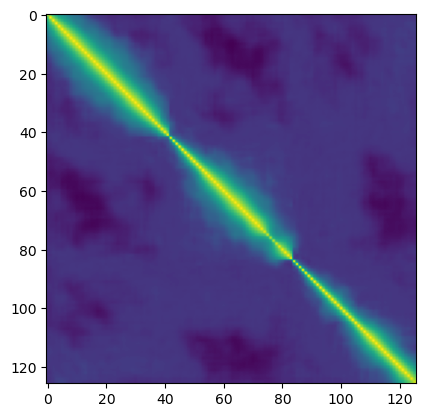

In [7]:
predictions = loaded_model.predict(val_noisy)
plt.imshow(predictions[0].reshape(cov_len, cov_len))